In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/full_incl_temp.csv')
print(df.shape, df.columns)
df['temp']= df['temp']-272
df.head()

(44566, 50) Index(['Logische Periode ', ' Endzeitstempel ', ' Status ', ' Tarif ',
       'location', 'adress', 'datetime', 'Wert', 'temp', 'temp_hamburg',
       'temp_dresden', 'temp_berlin', 'datetimeYear', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeHour', 'datetimeMinute', 'datetimeSecond', 'datetimeElapsed',
       'lat', 'long', 'city', '48-lag', '24-lag', 'dif', 'temp.1', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')


,Logische Periode,Endzeitstempel,Status,Tarif,location,adress,datetime,Wert,temp,temp_hamburg,...,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,08.01.2019,07:00:00,W,tariflos,Joachim-Karnatz-Allee,"10725 Berlin, Joachim-Karnatz-Allee 43",2019-01-08 07:00:00,858.660,6.64,279.15,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n
1,08.01.2019,07:00:00,W,tariflos,Tharandter Str.,"Tharandter Str. 48, 01159 Dresden",2019-01-08 07:00:00,110.731,5.15,279.15,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
2,08.01.2019,07:00:00,W,tariflos,Lüttkamp,"22715 Hamburg, Lüttkamp 5",2019-01-08 07:00:00,365.674,7.15,279.15,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
3,08.01.2019,07:00:00,W,tariflos,Flughafenstr.,"22583 Hamburg, Flughafenstr. 7412",2019-01-08 07:00:00,174.427,7.15,279.15,...,NaN,NaN,NaN,NaN,NaN,75,520,Rain,light intensity shower rain,09n
4,08.01.2019,07:00:00,W,tariflos,Triftstr.,"13296 Berlin, Triftstr. 31",2019-01-08 07:00:00,1191.334,6.64,279.15,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n


In [353]:
print(df.shape)
df = df[df['Wert'] != 0]
print(df.shape)

(44566, 51)
(42976, 51)


In [3]:
df['48-lag'] = df['48-lag'].astype(float)
df['dif'] = df['dif'].astype(float)
df['Wert'] = df['Wert'].astype(float)
df['temp'] = df['temp'].astype(float)

In [4]:
cols = ['Wert', 'location', 'datetimeMonth', 
        'datetimeDayofweek', 'datetimeDayofyear', 'datetimeHour',
         'datetimeElapsed', 'city', '48-lag','temp',
#         'weather_main'
       ]
df_tab = df[cols].dropna()
df_tab[df_tab.isnull().any(axis=1)]

,Wert,location,datetimeMonth,datetimeDayofweek,datetimeDayofyear,datetimeHour,datetimeElapsed,city,48-lag,temp


In [5]:
valid_idx = [idx for idx,month,day in zip(range(len(df_tab)),list(df_tab.datetimeMonth),list(df_tab.datetimeDayofweek)) if ( np.random.rand()<.1)] 
print(len(valid_idx), len(df_tab), len(valid_idx)/len(df_tab))
print(df_tab[cols].shape)

4296 44126 0.09735756696732085
(44126, 10)


In [6]:
from fastai import *
from fastai.tabular import *
print(__version__)

1.0.57


In [8]:
print(len(valid_idx),df.shape)
cat_names = ['location','datetimeMonth','datetimeDayofweek','datetimeHour', 'city',
#              'weather_main'
            ]
dep_var = 'Wert'

4296 (44566, 50)


In [9]:

procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('data', df_tab, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [29]:
learn = tabular_learner(data,[256,256],metrics=[mean_absolute_error,exp_rmspe],
#                         ,emb_szs={'City':5,'Country':5},
                        ps=[0.001,0.01], emb_drop=0.04,
                        callback_fns=ShowGraph
                       )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


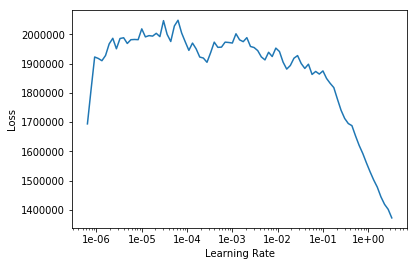

In [30]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,exp_rmspe,time
0,75464.109375,23096.013672,87.630638,nan,00:05


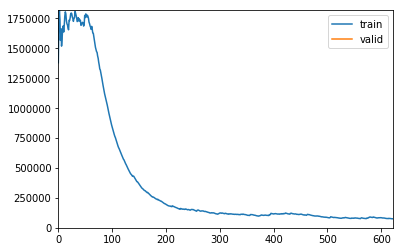

In [31]:
learn.fit_one_cycle(1,.1)

In [32]:
learn.validate()

[23096.014, tensor(87.6306), tensor(nan)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


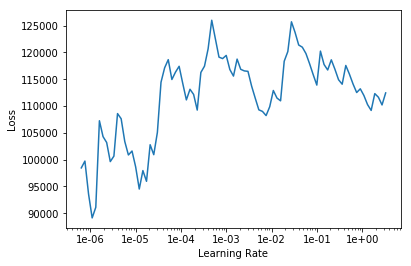

In [20]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,exp_rmspe,time
0,96112.562500,27928.371094,91.436111,nan,00:05


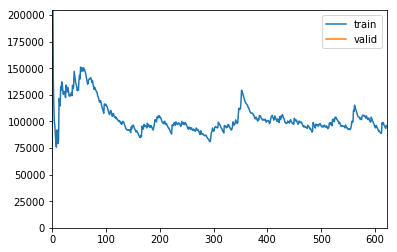

In [21]:
learn.fit_one_cycle(1,3e-5)

In [311]:
learn.validate()

[0.28846595, tensor(0.2937), tensor(4.0625)]

In [37]:
learn.save('new_data_19')

In [34]:
learn.load('new_data');

In [290]:
np.log(df.dif+5).mean()

3.853784062949676

In [35]:
100-(learn.validate()[1]/df.dif.mean()).numpy()*100

19.636082649230957

In [36]:
100-(79.5499/95.44201567656432)*100

16.65106878130051

In [38]:
df_pred = df.loc[:,cols+['Wert']].dropna()
datatest = TabularList.from_df(df_pred, cat_names=cat_names,  procs=procs)
learn.data.add_test(datatest) 
# # print(learn.data)
preds, targets = learn.get_preds(DatasetType.Test)

tensor(737.5366) tensor(1166.5831)


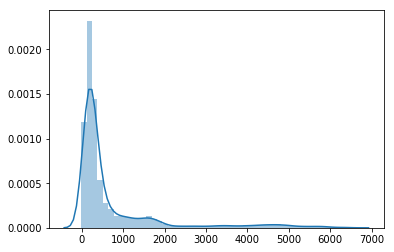

In [39]:
print(preds[:,0].mean(), preds[:,0].std())
sns.distplot(list(preds[:,0]))

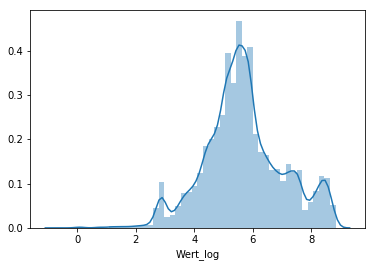

In [367]:
sns.distplot(df_pred['Wert_log'])

In [50]:
df_pred['predicted'] = preds[:,0].numpy()
df_pred['predicted'].mean(), df_pred['predicted'].std()

(737.5403442382812, 1166.5848388671875)

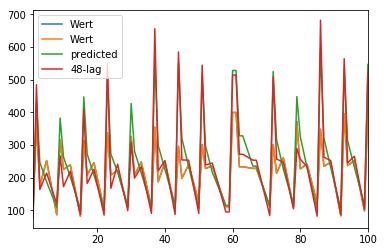

In [51]:
df_pred.loc[:100,['Wert','predicted','48-lag']].plot()

In [53]:
df_pred['dif_tako'] = abs(df_pred['predicted'] - df_pred['Wert'])
df_pred['dif_guido'] = abs(df_pred['48-lag'] - df_pred['Wert'])
print(df_pred['dif_tako'].mean(),df_pred['dif_guido'].mean())

TypeError: '<' not supported between instances of 'str' and 'int'

In [373]:
df_pred.to_csv('predicted_boosted_wert.csv',index=False)

In [48]:
df_pred.columns

Index(['Wert', 'location', 'datetimeMonth', 'datetimeDayofweek',
       'datetimeDayofyear', 'datetimeHour', 'datetimeElapsed', 'city',
       '48-lag', 'temp', 'predicted', 'dif_tako', 'dif_guido'],
      dtype='object')

In [72]:
a = (df_pred[df['location']=='Bottroper Weg'].Wert.sum())
a/1000000

8.6847385

In [73]:
a = a*40
a = a*1.02264

In [78]:
a = a/3.6

In [79]:
a/1000000

98.68178866266666